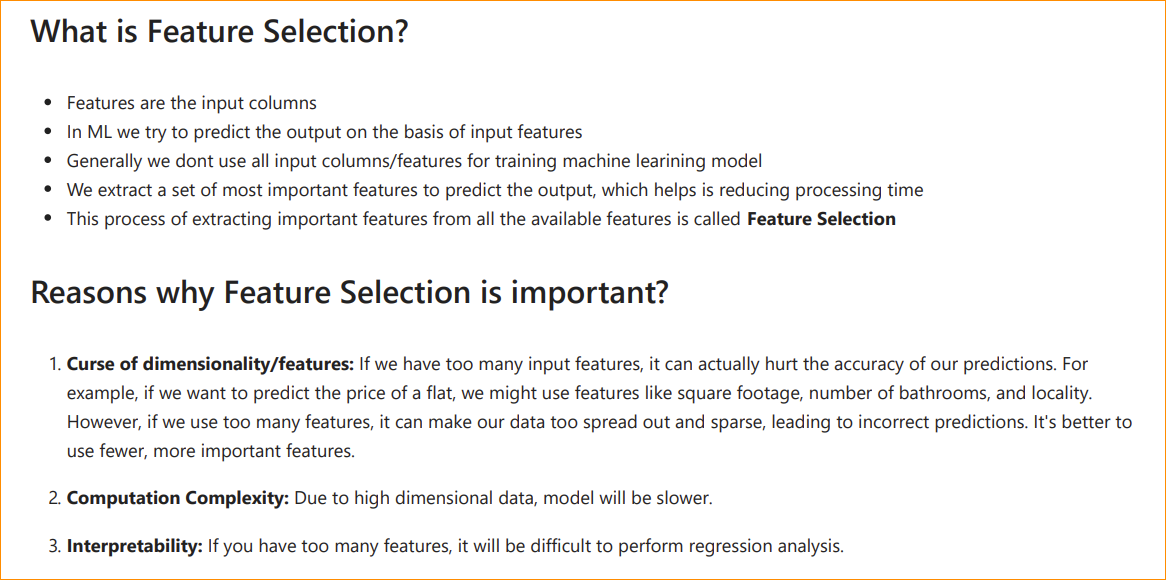

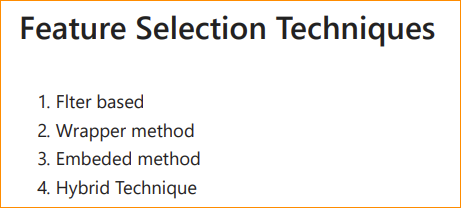

### --- I have 3 dataframes which were created using different missing value imputation techniques, Objective is to find Most Important features using selection & reduce dimensionality which is currently 800+ due to One Hot Encoding & then apply Feature Extraction Techniqeus if data is still high dimension for each dataframe & then select most common features & apply advance missing value imputation techniques to make more robust data***

## Step1: Remove duplicate features before applying feature selection/extraction techniques

In [1]:
import pandas as pd

# Reading Excel files into DataFrames
df_mean_mode_ohe = pd.read_excel(r"H:\CampusX_DS\week43 - My Projects Aug 2024\used_car_price_prediction\Used-Car-Price-Prediction\src\notebook\data\model_ready_data\df_mean_mode_ohe.xlsx")
df_median_mode_ohe = pd.read_excel(r"H:\CampusX_DS\week43 - My Projects Aug 2024\used_car_price_prediction\Used-Car-Price-Prediction\src\notebook\data\model_ready_data\df_median_mode_ohe.xlsx")
df_knn_imputed_ohe = pd.read_excel(r"H:\CampusX_DS\week43 - My Projects Aug 2024\used_car_price_prediction\Used-Car-Price-Prediction\src\notebook\data\model_ready_data\df_knn_imputed_ohe.xlsx")

In [2]:
df_mean_mode_ohe.drop(columns=['content.appointmentId'], inplace=True)

In [3]:
print(df_mean_mode_ohe.shape, df_median_mode_ohe.shape, df_knn_imputed_ohe.shape)

(2719, 816) (2719, 817) (2719, 824)


In [4]:
# Step 1: Identify and remove completely duplicate columns
df_mean_mode_ohe = df_mean_mode_ohe.loc[:, ~df_mean_mode_ohe.T.duplicated()]
df_median_mode_ohe = df_median_mode_ohe.loc[:, ~df_median_mode_ohe.T.duplicated()]
df_knn_imputed_ohe = df_knn_imputed_ohe.loc[:, ~df_knn_imputed_ohe.T.duplicated()]

In [5]:
# check which columns were removed (if any)
removed_columns_mean_mode = df_mean_mode_ohe.columns[df_mean_mode_ohe.T.duplicated()]
removed_columns_median_mode = df_median_mode_ohe.columns[df_median_mode_ohe.T.duplicated()]
removed_columns_knn_imputed = df_knn_imputed_ohe.columns[df_knn_imputed_ohe.T.duplicated()]

In [6]:
removed_columns_mean_mode

Index([], dtype='object')

In [7]:
print(df_mean_mode_ohe.shape, df_median_mode_ohe.shape, df_knn_imputed_ohe.shape)

(2719, 803) (2719, 804) (2719, 812)


## Step2: Find Base Accuracy of each dataset to compare (Apply All Regression Algorithms)

In [15]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.svm import SVR
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.gaussian_process import GaussianProcessRegressor
# from sklearn.neural_network import MLPRegressor
# import xgboost as xgb
# import lightgbm as lgb
# from catboost import CatBoostRegressor
# import statsmodels.api as sm
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# import warnings; warnings.filterwarnings('ignore')

# # Define a list of algorithms grouped as mentioned
# linear_regression_models = {
#     'Linear Regression': LinearRegression(),
#     'Ridge Regression': Ridge(),
#     'Lasso Regression': Lasso(),
#     'ElasticNet Regression': ElasticNet()
# }

# non_linear_regression_models = {
#     'Decision Tree': DecisionTreeRegressor(),
#     'Random Forest': RandomForestRegressor(),
#     'Support Vector Machine (SVR)': SVR(),
#     'K-Nearest Neighbors': KNeighborsRegressor(),
#     'Gaussian Process': GaussianProcessRegressor()
# }

# advanced_regression_models = {
#     'XGBoost': xgb.XGBRegressor(objective='reg:squarederror'),
#     'LightGBM': lgb.LGBMRegressor(),
#     'CatBoost': CatBoostRegressor(learning_rate=0.1, iterations=500, depth=6, silent=True)
# }

# # Deep Learning Model
# def build_keras_nn(X_train, y_train, X_test):
#     model = Sequential()
#     model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
#     model.add(Dense(32, activation='relu'))
#     model.add(Dense(1))
#     model.compile(optimizer='adam', loss='mean_squared_error')
#     model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)
#     y_pred = model.predict(X_test)
#     return y_pred

# deep_learning_models = {
#     'Keras Neural Network': build_keras_nn
# }

# # Bayesian Regression Model
# bayesian_regression_models = {
#     'Bayesian Linear Regression': sm.OLS
# }

# # Combine all models into one dictionary
# all_models = {
#     **linear_regression_models,
#     **non_linear_regression_models,
#     **advanced_regression_models,
#     **deep_learning_models,
#     **bayesian_regression_models
# }

# # Function to apply all regression models to a dataset
# def apply_regression_models(data, target_column):
#     X = data.drop(target_column, axis=1)
#     y = data[target_column]
    
#     # Preprocessing: Convert categorical variables to dummy variables, and scale features
#     X = pd.get_dummies(X)  # Convert categorical variables to dummy variables
#     X = StandardScaler().fit_transform(X)  # Standard scaling
    
#     # Split into train and test sets
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
#     # Dictionary to hold results
#     results = []
    
#     # Apply each model
#     for name, model in all_models.items():
#         try:
#             if name == 'Keras Neural Network':
#                 # Special handling for Keras Neural Network
#                 y_pred = model(X_train, y_train, X_test)
#             elif name == 'Bayesian Linear Regression':
#                 # For Bayesian Linear Regression, use statsmodels' OLS method
#                 # Add constant term to both training and test set
#                 X_train_with_const = sm.add_constant(X_train)  # Adds a constant term for the intercept
#                 model_ols = model(X_train_with_const, y_train).fit()
                
#                 # Add constant term to test data to match the training set
#                 X_test_with_const = sm.add_constant(X_test)  # Ensure constant term is added to X_test
                
#                 # Predict using the test data with a constant term
#                 y_pred = model_ols.predict(X_test_with_const)
#             else:
#                 # Fit the model
#                 model.fit(X_train, y_train)
#                 # Predict on the test set
#                 y_pred = model.predict(X_test)
            
#             # Calculate Mean Squared Error and R² Score
#             mse = mean_squared_error(y_test, y_pred)
#             r2 = r2_score(y_test, y_pred)  # R² score to measure goodness of fit
            
#             # Store result
#             results.append({
#                 'Algorithm': name,
#                 'MSE': mse,
#                 'R²': r2
#             })
#         except Exception as e:
#             print(f"Error occurred while processing model {name}: {e}")
    
#     # Return the results as a DataFrame, if any results exist
#     if results:
#         return pd.DataFrame(results)
#     else:
#         return pd.DataFrame()  # Return an empty DataFrame if no results

# # List of dataframes (df1, df2, df3)
# datasets = [df_mean_mode_ohe, df_median_mode_ohe, df_knn_imputed_ohe]

# # Loop over datasets
# results_all_datasets = []

# for idx, dataset in enumerate(datasets, start=1):
#     try:
#         print(f"Applying models to dataset {idx}")
#         # Apply regression models on the current dataset
#         target_column = 'content.onRoadPrice'
#         results_df = apply_regression_models(dataset, target_column)

#         # Check if results_df is not empty before appending
#         if not results_df.empty:
#             # Add dataset identifier to the results
#             results_df['Dataset'] = f'dataset_{idx}'
#             # Append results to the final list
#             results_all_datasets.append(results_df)
#         else:
#             print(f"No results for dataset {idx}")
#     except Exception as e:
#         print(f"Error applying models to dataset {idx}: {e}")

# # Check if there are any results to concatenate
# if results_all_datasets:
#     # Combine results of all datasets into one DataFrame
#     final_results = pd.concat(results_all_datasets, ignore_index=True)

#     # Sort the results by R² (or MSE, depending on your preference)
#     final_results_sorted = final_results.sort_values(by='R²', ascending=False)

#     # Display the sorted results, including the dataset name
#     print(final_results_sorted[['Dataset', 'Algorithm', 'R²', 'MSE']])
# else:
#     print("No results to concatenate.")

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor
import statsmodels.api as sm
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import warnings; warnings.filterwarnings('ignore')

# Define a list of algorithms grouped as mentioned
linear_regression_models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'ElasticNet Regression': ElasticNet()
}

non_linear_regression_models = {
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Machine (SVR)': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Gaussian Process': GaussianProcessRegressor()
}

advanced_regression_models = {
    'XGBoost': xgb.XGBRegressor(objective='reg:squarederror'),
    'LightGBM': lgb.LGBMRegressor(),
    'CatBoost': CatBoostRegressor(learning_rate=0.1, iterations=500, depth=6, silent=True)
}

# Deep Learning Model
def build_keras_nn(X_train, y_train):
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

# Bayesian Regression Model
bayesian_regression_models = {
    'Bayesian Linear Regression': sm.OLS
}

# Combine all models into one dictionary
all_models = {
    **linear_regression_models,
    **non_linear_regression_models,
    **advanced_regression_models,
    'Keras Neural Network': build_keras_nn,
    **bayesian_regression_models
}

# Function to apply all regression models to a dataset using cross-validation
def apply_regression_models(data, target_column):
    X = data.drop(target_column, axis=1)
    y = data[target_column]
    
    # Preprocessing: Convert categorical variables to dummy variables, and scale features
    X = pd.get_dummies(X)  # Convert categorical variables to dummy variables
    X = StandardScaler().fit_transform(X)  # Standard scaling
    
    # Dictionary to hold results
    results = []
    
    # Apply each model using cross-validation
    for name, model in all_models.items():
        try:
            if name == 'Keras Neural Network':
                # Keras model needs to be fit on the entire dataset
                build_keras_nn(X, y)
                y_pred = model.predict(X)
                mse = mean_squared_error(y, y_pred)
                r2 = r2_score(y, y_pred)
            elif name == 'Bayesian Linear Regression':
                X_with_const = sm.add_constant(X)
                model_ols = model(X_with_const, y).fit()
                y_pred = model_ols.predict(X_with_const)
                mse = mean_squared_error(y, y_pred)
                r2 = r2_score(y, y_pred)
            else:
                # Use cross-validation
                scores = cross_val_score(model, X, y, scoring='r2', cv=5)
                r2 = np.mean(scores)
                mse = -np.mean(cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5))
            
            # Store result
            results.append({
                'Algorithm': name,
                'MSE': mse,
                'R²': r2
            })
        except Exception as e:
            print(f"Error occurred while processing model {name}: {e}")
    
    # Return the results as a DataFrame, if any results exist
    if results:
        return pd.DataFrame(results)
    else:
        return pd.DataFrame()  # Return an empty DataFrame if no results

# List of dataframes (df1, df2, df3)
datasets = [df_mean_mode_ohe, df_median_mode_ohe, df_knn_imputed_ohe]

# Loop over datasets
results_all_datasets = []

for idx, dataset in enumerate(datasets, start=1):
    try:
        print(f"Applying models to dataset {idx}")
        # Apply regression models on the current dataset
        target_column = 'content.onRoadPrice'
        results_df = apply_regression_models(dataset, target_column)

        # Check if results_df is not empty before appending
        if not results_df.empty:
            # Add dataset identifier to the results
            results_df['Dataset'] = f'dataset_{idx}'
            # Append results to the final list
            results_all_datasets.append(results_df)
        else:
            print(f"No results for dataset {idx}")
    except Exception as e:
        print(f"Error applying models to dataset {idx}: {e}")

# Check if there are any results to concatenate
if results_all_datasets:
    # Combine results of all datasets into one DataFrame
    final_results = pd.concat(results_all_datasets, ignore_index=True)

    # Sort the results by R² (or MSE, depending on your preference)
    final_results_sorted = final_results.sort_values(by='R²', ascending=False)

    # Display the sorted results, including the dataset name
    print(final_results_sorted[['Dataset', 'Algorithm', 'R²', 'MSE']])
else:
    print("No results to concatenate.")

Applying models to dataset 1
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001463 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1437
[LightGBM] [Info] Number of data points in the train set: 2175, number of used features: 162
[LightGBM] [Info] Start training from score 953609.615632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002134 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1462
[LightGBM] [Info] Number of data points in the train set: 2175, number of used features: 164
[LightGBM] [Info] Start training from score 963839.552184
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002454 seconds.
You can set `force_row_wise=true` to remove t

Error occurred while processing model Keras Neural Network: 'function' object has no attribute 'predict'
Error occurred while processing model Bayesian Linear Regression: shapes (2719,804) and (1,804) not aligned: 804 (dim 1) != 1 (dim 0)
Applying models to dataset 3
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001790 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2003
[LightGBM] [Info] Number of data points in the train set: 2175, number of used features: 171
[LightGBM] [Info] Start training from score 953609.615632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002357 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2033
[LightGBM] [Info] Number of data points in the train set: 217

##### We are able to achieve 96% accuracy with shape: 2719, 803

## Step2: Decide which technique to use

- create a dataframe of columns: Name of technique, What it does, Pros & Cons for each technique based on our data
- Try each technique 1 by 1 & check accuracy & understand what works & what not

## Step3: Apply Feature Selection Technique

#### 1. Filter Based Techniques: Variance Threshold Method

- Variance Threshold is a method to remove unnecessary features (columns) from our data that don't change much and hence, don't contribute to the prediction.
    1. Constant Features: These are columns where the value remains the same for all rows. Since these columns don't change, they have no variance (variance = 0). They don't help in predicting the output, so we drop them.
    2. Quasi-Constant Features: These are columns where most of the rows have the same value. The variance in these columns is very close to 0. They also don't provide much useful information. How to Use Variance Threshold:


- Normalize the data to same scale
- Set a Threshold: Decide on a variance threshold b/w 0.1 to 0.01
- Calculate Variance: Compute the variance for all input features (columns).
- Filter and Drop: Remove columns whose variance is less than the threshold.

#### creating a copy of dataframe

In [9]:
df_mean_mode_VarianceThreshold, df_median_mode_VarianceThreshold, df_knn_imputed_VarianceThreshold = (df.copy() for df in [df_mean_mode_ohe, df_median_mode_ohe, df_knn_imputed_ohe])

#### check dataframe shape before

In [10]:
print(df_mean_mode_VarianceThreshold.shape)
print(df_median_mode_VarianceThreshold.shape)
print(df_knn_imputed_VarianceThreshold.shape)

(2719, 803)
(2719, 804)
(2719, 812)


### 1. Variance threshold

In [11]:
from sklearn.feature_selection import VarianceThreshold

# List of dataframes (df1, df2, df3)
datasets = [df_mean_mode_ohe, df_median_mode_ohe, df_knn_imputed_ohe]

# Set the variance threshold value
threshold = 0.1
vt = VarianceThreshold(threshold)

# Store filtered datasets
filtered_datasets = []

# Loop over datasets for feature selection
for idx, dataset in enumerate(datasets, start=1):
    try:
        print(f"Applying Variance Threshold to dataset {idx}")
        
        # Apply VarianceThreshold
        X = dataset.drop('content.onRoadPrice', axis=1)
        y = dataset['content.onRoadPrice']
        X_filtered = vt.fit_transform(X)
        
        # Create a new DataFrame with filtered features
        filtered_columns = X.columns[vt.get_support()]
        filtered_dataset = pd.DataFrame(X_filtered, columns=filtered_columns)
        filtered_dataset['content.onRoadPrice'] = y.values  # Add target column back
        
        # Append filtered dataset to the list
        filtered_datasets.append(filtered_dataset)
        
    except Exception as e:
        print(f"Error applying Variance Threshold to dataset {idx}: {e}")

Applying Variance Threshold to dataset 1
Applying Variance Threshold to dataset 2
Applying Variance Threshold to dataset 3


#### check dataframe shape after

In [12]:
for i in filtered_datasets:
    print(i.shape)

(2719, 68)
(2719, 70)
(2719, 77)


#### Check Accuracy on filterd dataframe

In [17]:
# Now run regression models on the filtered datasets
results_all_datasets = []

for idx, filtered_dataset in enumerate(filtered_datasets, start=1):
    try:
        print(f"Applying regression models to filtered dataset {idx}")
        
        # Apply regression models on the filtered dataset
        target_column = 'content.onRoadPrice'
        results_df = apply_regression_models(filtered_dataset, target_column)

        # Check if results_df is not empty before appending
        if not results_df.empty:
            results_df['Dataset'] = f'dataset_{idx}'
            results_all_datasets.append(results_df)
        else:
            print(f"No results for filtered dataset {idx}")
    except Exception as e:
        print(f"Error applying models to filtered dataset {idx}: {e}")

# Check if there are any results to concatenate
if results_all_datasets:
    final_results = pd.concat(results_all_datasets, ignore_index=True)
    final_results_sorted = final_results.sort_values(by='R²', ascending=False)
    print(final_results_sorted[['Dataset', 'Algorithm', 'R²', 'MSE']])
else:
    print("No results to concatenate.")

# Updated function to apply regression models with cross-validation
def apply_regression_models(data, target_column):
    X = data.drop(target_column, axis=1)
    y = data[target_column]
    
    # Preprocessing: Convert categorical variables to dummy variables, and scale features
    X = pd.get_dummies(X)  # Convert categorical variables to dummy variables
    X = StandardScaler().fit_transform(X)  # Standard scaling
    
    # Dictionary to hold results
    results = []
    
    # Apply each model using cross-validation
    for name, model in all_models.items():
        try:
            if name == 'Keras Neural Network':
                # Keras model needs to be fit on the entire dataset
                build_keras_nn(X, y)
                y_pred = model.predict(X)
                mse = mean_squared_error(y, y_pred)
                r2 = r2_score(y, y_pred)
            elif name == 'Bayesian Linear Regression':
                X_with_const = sm.add_constant(X)
                model_ols = model(X_with_const, y).fit()
                y_pred = model_ols.predict(X_with_const)
                mse = mean_squared_error(y, y_pred)
                r2 = r2_score(y, y_pred)
            else:
                # Use cross-validation
                scores_r2 = cross_val_score(model, X, y, scoring='r2', cv=5)
                r2 = np.mean(scores_r2)
                mse = -np.mean(cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5))
            
            # Store result
            results.append({
                'Algorithm': name,
                'MSE': mse,
                'R²': r2
            })
        except Exception as e:
            print(f"Error occurred while processing model {name}: {e}")
    
    # Return the results as a DataFrame, if any results exist
    if results:
        return pd.DataFrame(results)
    else:
        return pd.DataFrame()  # Return an empty DataFrame if no results

Applying regression models to filtered dataset 1
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000559 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1149
[LightGBM] [Info] Number of data points in the train set: 2175, number of used features: 67
[LightGBM] [Info] Start training from score 953609.615632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000505 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1168
[LightGBM] [Info] Number of data points in the train set: 2175, number of used features: 67
[LightGBM] [Info] Start training from score 963839.552184
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000521 seconds.
You can set `force_row_wise

Error occurred while processing model Keras Neural Network: 'function' object has no attribute 'predict'
Error occurred while processing model Bayesian Linear Regression: shapes (2719,70) and (1,70) not aligned: 70 (dim 1) != 1 (dim 0)
Applying regression models to filtered dataset 3
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000733 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1718
[LightGBM] [Info] Number of data points in the train set: 2175, number of used features: 76
[LightGBM] [Info] Start training from score 953609.615632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000619 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1742
[LightGBM] [Info] Number of data points in th

##### It seems to be accuracy has not change even after columns reduced to: 2719, 68

### What Variance Threshold Method Does?

- Variance Threshold is a method to remove unnecessary features (columns) from our data that don't change much (columns which have less variance) and hence, don't contribute to the prediction.

- There are 2 types of features:
    1. Constant Features: These are columns where the value remains the same for all rows. Since these columns don't change, they have no variance (variance = 0). They don't help in predicting the output, so we drop them.
    2. Quasi-Constant Features: These are columns where most of the rows have the same value. The variance in these columns is very close to 0. They also don't provide much useful information.
    
- Flow:
    1. Normalize the data to same scale
    2. Set a Threshold: Decide on a variance threshold b/w 0.1 to 0.01
    3. Calculate Variance: Compute the variance for all input features (columns)
    4. Filter and Drop: Remove columns whose variance is less than the threshold.
    
- **Points to consider beore applying Variance Threshold**
1. Ignores target variable: Since its a univariate technique, It completly ignores the relation b/w input feature & target so while removing feature with low variance it may keep features with high variance which has no relation with target & sometime it happens that we drop feature due to low variance which had high impact on target

2.  Ignore feature interaction: there may be 2 or more columns which together form a meaningfull column which has high impact on target but one of them got removed due to low variance, This method doesnt check relation b/w columns like latitude & longitude, if any of them falls under low variance threshold, It will be removed

3. Sensitive to data scaling: We need to perform scaling before applying this method bcoz there may 2 columns which has variance 1000 & 0.1 due to data not scaled so feature wih high variance will not be removed whereas its due to data not scaled.

4. Arbitary thershold value: Its difficult to define the threshold value, generally its said to keep value b/w 0.1 to 0.001 for normalized data.

### 2. Corelation

#### dataframe copy

In [20]:
df_mean_mode_corelation = filtered_datasets[0].copy()
df_median_mode_corelation = filtered_datasets[1].copy()
df_knn_imputed_corelation = filtered_datasets[2].copy()

In [21]:
print(df_mean_mode_corelation.shape)
print(df_median_mode_corelation.shape)
print(df_knn_imputed_corelation.shape)

(2719, 68)
(2719, 70)
(2719, 77)


#### apply corelation filter technique

In [22]:
def correlation_filter(dataset, target_column, threshold=0.5):
    # Calculate the correlation matrix
    correlation_matrix = dataset.corr()

    # Get the absolute correlation values with respect to the target column
    correlations = correlation_matrix[target_column].abs()

    # Select features that have a correlation higher than the specified threshold
    relevant_features = correlations[correlations > threshold].index.tolist()

    # Create a new DataFrame with the selected features
    filtered_dataset = dataset[relevant_features]

    return filtered_dataset

# Applying correlation filter to each dataset
df_mean_mode_correlation = correlation_filter(df_mean_mode_corelation, 'content.onRoadPrice', threshold=0.5)
df_median_mode_correlation = correlation_filter(df_median_mode_corelation, 'content.onRoadPrice', threshold=0.5)
df_knn_imputed_correlation = correlation_filter(df_knn_imputed_corelation, 'content.onRoadPrice', threshold=0.5)

# Display the shapes of the new DataFrames to confirm
print("Filtered datasets created:")
print("df_mean_mode_correlation:", df_mean_mode_correlation.shape)
print("df_median_mode_correlation:", df_median_mode_correlation.shape)
print("df_knn_imputed_correlation:", df_knn_imputed_correlation.shape)

Filtered datasets created:
df_mean_mode_correlation: (2719, 17)
df_median_mode_correlation: (2719, 17)
df_knn_imputed_correlation: (2719, 19)


#### check accuracy on filtered dataset

In [23]:
# Now run regression models on the filtered datasets
results_all_datasets = []

filtered_dataset = [df_mean_mode_correlation, df_median_mode_correlation, df_knn_imputed_correlation]

for idx, filtered_dataset in enumerate(filtered_datasets, start=1):
    try:
        print(f"Applying regression models to filtered dataset {idx}")
        
        # Apply regression models on the filtered dataset
        target_column = 'content.onRoadPrice'
        results_df = apply_regression_models(filtered_dataset, target_column)

        # Check if results_df is not empty before appending
        if not results_df.empty:
            results_df['Dataset'] = f'dataset_{idx}'
            results_all_datasets.append(results_df)
        else:
            print(f"No results for filtered dataset {idx}")
    except Exception as e:
        print(f"Error applying models to filtered dataset {idx}: {e}")

# Check if there are any results to concatenate
if results_all_datasets:
    final_results = pd.concat(results_all_datasets, ignore_index=True)
    final_results_sorted = final_results.sort_values(by='R²', ascending=False)
    print(final_results_sorted[['Dataset', 'Algorithm', 'R²', 'MSE']])
else:
    print("No results to concatenate.")

# Updated function to apply regression models with cross-validation
def apply_regression_models(data, target_column):
    X = data.drop(target_column, axis=1)
    y = data[target_column]
    
    # Preprocessing: Convert categorical variables to dummy variables, and scale features
    X = pd.get_dummies(X)  # Convert categorical variables to dummy variables
    X = StandardScaler().fit_transform(X)  # Standard scaling
    
    # Dictionary to hold results
    results = []
    
    # Apply each model using cross-validation
    for name, model in all_models.items():
        try:
            if name == 'Keras Neural Network':
                # Keras model needs to be fit on the entire dataset
                build_keras_nn(X, y)
                y_pred = model.predict(X)
                mse = mean_squared_error(y, y_pred)
                r2 = r2_score(y, y_pred)
            elif name == 'Bayesian Linear Regression':
                X_with_const = sm.add_constant(X)
                model_ols = model(X_with_const, y).fit()
                y_pred = model_ols.predict(X_with_const)
                mse = mean_squared_error(y, y_pred)
                r2 = r2_score(y, y_pred)
            else:
                # Use cross-validation
                scores_r2 = cross_val_score(model, X, y, scoring='r2', cv=5)
                r2 = np.mean(scores_r2)
                mse = -np.mean(cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5))
            
            # Store result
            results.append({
                'Algorithm': name,
                'MSE': mse,
                'R²': r2
            })
        except Exception as e:
            print(f"Error occurred while processing model {name}: {e}")
    
    # Return the results as a DataFrame, if any results exist
    if results:
        return pd.DataFrame(results)
    else:
        return pd.DataFrame()  # Return an empty DataFrame if no results

Applying regression models to filtered dataset 1
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000561 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1149
[LightGBM] [Info] Number of data points in the train set: 2175, number of used features: 67
[LightGBM] [Info] Start training from score 953609.615632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000850 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1168
[LightGBM] [Info] Number of data points in the train set: 2175, number of used features: 67
[LightGBM] [Info] Start training from score 963839.552184
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000789 seconds.
You can set `force_row_wise

Error occurred while processing model Keras Neural Network: 'function' object has no attribute 'predict'
Error occurred while processing model Bayesian Linear Regression: shapes (2719,70) and (1,70) not aligned: 70 (dim 1) != 1 (dim 0)
Applying regression models to filtered dataset 3
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001173 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1718
[LightGBM] [Info] Number of data points in the train set: 2175, number of used features: 76
[LightGBM] [Info] Start training from score 953609.615632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000598 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1742
[LightGBM] [Info] Number of data points in th

#### shape of dataframe reduced to 2719, 19 & accuracy remains 96% after CV

### What Corelation Filter Method Does?

1. Correlation filter is a method used to select important features (or variables) from a dataset based on how strongly they relate to a target variable (the outcome you’re interested in predicting).

2. It looks at how closely related two variables are. If one variable changes, does the other change too? This relationship is measured on a scale from -1 to 1:
    - 1 means a perfect positive relationship (both increase together).
    - -1 means a perfect negative relationship (one increases while the other decreases).
    - 0 means no relationship.

3. Its doesnt capture non-linear relationship so if 2 columns have non-linear relationship then this will fail

4. It only captures relationship b/w 2 variables not more then 2, There could be a chance that
3 or 4 columns together have strong relationship with output

5. Just like variance threshold, corelation threshold is subjective

6. Corelation is sensitive to outliers.